In [1]:
import pandas as pd
import glob
import os
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

In [2]:
dropbox_dir = "/Users/kendraziegler/Dropbox (Palmer Lab)"
#dropbox_dir = "C:/Users/cocoy/Dropbox (Palmer Lab)"

meta_dir = dropbox_dir + "/Suzanne_Mitchell_U01/Data-locomotor"


## Loading in raw data for C01-C06

In [3]:
#Creating one dataframe with all locomotor files
#Must manually unzip all folders
#Must combine locomotor 5 files from T1&T2 and T3&T4 into one file named comprehensive_output_files
#Will not be doing analysis on C06 or C07
cohorts_dir = ['Shipment1_locomotor',
               'Shipment2_locomotor',
               'Shipment3_locomotor',
               'Shipment4_locomotor',
               'Shipment5_locomotor',
               'Shipment6_locomotor',
               'ShipR_locomotor']

zip_folder = ['U01_Shipment1_Locomotor/comprehensive-output-files/',
              'U01_Shipment2_Locomotor/S2-comprehensive-output-files/',
              'U01-Shipment3_Locomotor/S3-comprehensive-out-files/',
              'comprehensive_output_files/comprehensive_output_files/',
              'comprehensive-output-files/',
              'Ship6-comprehensive-output-files/S6-comprehensive-out-files/',
              'R-comprehensive-output-files/R-comprehensive-output-files/']
dir_dict = {cohorts_dir[i]: zip_folder[i] for i in range(len(cohorts_dir))}
count = 0
df_excel = pd.DataFrame()
df_csv = pd.DataFrame()
for cohort_dir,zip_folder in dir_dict.items():
        #for cohort in cohort_list:
        raw_dir = meta_dir + "/" + cohort_dir + "/" + zip_folder
        os.chdir(raw_dir)
        for file in os.listdir(raw_dir):
            if file.endswith('.xlsx'):
                df_excel = df_excel.append(pd.read_excel(file), ignore_index=True)
            elif file.endswith('.csv'):
                input_file = pd.read_csv(file, skiprows = 58)
                df_csv_date = pd.read_csv(file, skiprows=53, nrows=1)
                rows = list(df_csv_date)
                #print(df_csv_date)
                date = rows[1]
                date = pd.to_datetime(date).date()
                #print(date)
                input_file['date'] = date
                #print(date)
                df_csv = df_csv.append(input_file, ignore_index=True)

                
df_csv
#print(count)

,EXPERIMENT,CAGE,SUBJECT ID,SUBJECT TYPE,SUBJECT SEX,SUBJECT AGE,SUBJECT TREATMENT,BATCH,PHASE,SAMPLE,...,LEFT-FRONT TIME LEGACY (s),RIGHT-FRONT TIME LEGACY (s),LEFT-REAR TIME LEGACY (s),RIGHT-REAR TIME LEGACY (s),MARGIN TIME LEGACY (s),CENTER TIME LEGACY (s),MARGIN DISTANCE LEGACY (cm),CENTER DISTANCE LEGACY (cm),Unnamed: 44,date
0,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,1,...,1.00,1.88,0.00,1.06,35.51,24.49,100.72,131.26,NaN,2018-12-20
1,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,2,...,0.00,0.00,0.00,6.47,47.35,12.65,152.35,103.79,NaN,2018-12-20
2,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,3,...,0.75,0.00,0.00,0.33,35.38,24.62,127.90,204.45,NaN,2018-12-20
3,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,4,...,0.00,0.00,0.00,7.55,40.35,19.66,61.70,114.53,NaN,2018-12-20
4,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,5,...,0.00,0.28,0.00,1.81,38.65,21.35,76.74,153.27,NaN,2018-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22090,U01-t1-gp27,Cage 4,24857,5-black,Unknown,12,NaN,Batch 1,NaN,11,...,0.00,0.00,0.00,45.56,59.44,0.56,91.80,19.89,NaN,2020-10-10
22091,U01-t1-gp27,Cage 4,24857,5-black,Unknown,12,NaN,Batch 1,NaN,12,...,0.02,0.00,0.02,27.28,47.66,12.34,97.26,149.42,NaN,2020-10-10
22092,U01-t1-gp27,Cage 4,24857,5-black,Unknown,12,NaN,Batch 1,NaN,13,...,0.00,0.08,0.08,28.05,48.20,11.80,138.02,133.71,NaN,2020-10-10
22093,U01-t1-gp27,Cage 4,24857,5-black,Unknown,12,NaN,Batch 1,NaN,14,...,0.00,0.00,0.00,50.78,60.00,0.00,8.25,0.00,NaN,2020-10-10


In [4]:
#concat dataframes to be one. C07 added to other cohorts
#df_csv = pd.concat([df_csv,df_excel_r])
#df_csv_r.loc[df_csv_r['SUBJECT ID'] == 24688]

## Initial Formatting

In [5]:
def format_df_csv(df_csv):
    #make column headers uniform
    df_csv.columns = df_csv.columns.str.replace(':','')
    df_csv.columns = df_csv.columns.str.replace(' ','_')
    df_csv.columns = df_csv.columns.str.lower()
    
    df_csv.rename(columns={'subject_id':'rfid','duration_(s)':'duration','total_distance_(cm)':'total_distance',
                           'total_distance_x-axis_(cm)':'total_distance_x','total_distance_y-axis_(cm)':
                           'total_distance_y','rest_time_(s)':'rest_time','movement_time_(s)':'movement_time',
                           'ambulatory_time_(s)':'ambulatory_time','stereotypy_time_(s)':'stereotypy_time',
                           'vertical_activity_time_(s)':'vertical_activity_time','ambulatory_episode_average_velocity_(cm/s)':
                           'ambulatory_episode_average_velocity','ambulatory_episode_peak_average_velocity_(cm/s)':
                           'ambulatory_episode_peak_average_velocity','ambulatory_episode_median_velocity_(cm/s)':
                           'ambulatory_episode_median_velocity','left-front_time_legacy_(s)':'left-front_time_legacy',
                           'right-front_time_legacy_(s)':'right_front_time_legacy','counter-clockwise_revolutions':
                           'counter_clockwise_revolutions','left-rear_time_legacy_(s)':'left_rear_time_legacy',
                           'right-rear_time_legacy_(s)':'right_rear_time_legacy','margin_time_legacy_(s)':
                           'margin_time_legacy','center_time_legacy_(s)':'center_time_legacy','margin_distance_legacy_(cm)':
                           'margin_distance_legacy','center_distance_legacy_(cm)':'center_distance_legacy'},inplace = True)
    
    #Remove uneccesary columns
    #Below: column header(only value contained in column)
    #subject_sex(unknown), subject_treatment(NaN),unnamed_44(NaN),batch(batch 1), duration(60)
    df_csv.drop(['subject_sex', 'subject_treatment','unnamed_44','batch','duration'], axis=1, inplace = True)
    
    return df_csv
    

df_csv = format_df_csv(df_csv)



## Specific Error Corrections for Mitchell 2022

In [6]:
#All error corrections


#87713 is in C05 but cannot be found in wfu_master
#87713 is a typo and should be 87173
#missing_cohort = locomotor_all[locomotor_all['cohort'].isna()]
#locomotor_all[locomotor_all['rfid'] == '933000320187173']
def fix_rfid(df):
    df['rfid'] = df['rfid'].astype(str)
    df.loc[(df.rfid == '87713'),'rfid'] = '87173'

#need to remove 933000320046763 from file U01-t2-gp13; rat had tail injury in first file
#file U01-t2-gp13-B contains the correct data for rat
#will remove 15 rows from table
def remove_incorrect(df):
    df.drop(df.loc[(df.experiment == 'U01-t2-gp13') & (df.rfid == '46763')].index, inplace = True)
    df.loc[(df.experiment == 'U01-t2-gp13-B'),'experiment'] = 'U01-t2-gp13'
    
#There is no U01-t1-gp2 in C05. Assume U01-t1-gp2a is its replacement
def file_rename(df):
    df.loc[(df.experiment == 'U01-t1-gp2a'),'experiment'] = 'U01-t1-gp2'
    #extra_file = locomotor_all[locomotor_all['experiment'] == 'U01-t1-gp2a']
    
remove_incorrect(df_csv)
fix_rfid(df_csv)
file_rename(df_csv)


## Creating columns based on file name

In [7]:
def splitting_cells(df):
    df['cage'] = df['cage'].str.replace('Cage ','')
    #df['phase'] = df['phase'].str.replace('Phase ','')
    #split cell based on -
    df['U01'] = df.experiment.str.split('-', expand = True)[0]
    df['time'] = df.experiment.str.split('-', expand = True)[1]
    df['file_num'] = df.experiment.str.split('-', expand = True)[2]

splitting_cells(df_csv)

## Rename and Reorder Columns 

In [8]:
def format_for_calc(df_csv):
    #drop uneeded columns for calc
    #U01 contains part of title I manually split, uneeded
    #subject_type is incorrect coat color naming
    #subject_age are incorrec values
    #phase and start time provides no useful info
    df = df_csv.drop(['U01','subject_type','subject_age','start_time','phase'], axis=1)
    #reorganize columns
    df = df[['experiment', 'rfid', 'time',
       'file_num', 'sample','cage','date', 'total_distance', 'total_distance_x',
       'total_distance_y', 'horizontal_activity_count',
       'ambulatory_activity_count', 'rest_time', 'rest_episode_count',
       'movement_time', 'movement_episode_count', 'ambulatory_time',
       'ambulatory_episode_count', 'stereotypy_time',
       'stereotypic_episode_count', 'stereotypic_activity_count',
       'stereotypic_episode_activity_count', 'vertical_episode_count',
       'vertical_activity_count', 'vertical_activity_time', 'jump_count',
       'clockwise_revolutions', 'counter_clockwise_revolutions',
       'ambulatory_episode_average_velocity',
       'ambulatory_episode_peak_average_velocity',
       'ambulatory_episode_median_velocity', 'left-front_time_legacy',
       'right_front_time_legacy', 'left_rear_time_legacy',
       'right_rear_time_legacy', 'margin_time_legacy', 'center_time_legacy',
       'margin_distance_legacy', 'center_distance_legacy']]
    #Drop rows that will not be used for calculations: t3, t4 according to Mitchell
    df.drop(df.loc[df['time']=='t3'].index, inplace=True)
    df.drop(df.loc[df['time']=='t4'].index, inplace=True)

    return df


locomotor = format_for_calc(df_csv)


## Drop columns that are not desired by Mitchell's team

In [9]:
def drop_unwanted(locomotor):
    #all the following were decided as unwanted by mitchells team
    locomotor = locomotor.drop(labels=[ 'total_distance_x',
 'total_distance_y',
 'horizontal_activity_count',
 'ambulatory_activity_count',
 'movement_time',
 'ambulatory_time',
 'ambulatory_episode_count',
 'stereotypy_time',
 'stereotypic_episode_count',
 'stereotypic_activity_count',
 'stereotypic_episode_activity_count',
 'vertical_episode_count',
 'vertical_activity_time',
 'jump_count',
 'clockwise_revolutions',
 'counter_clockwise_revolutions',
 'ambulatory_episode_average_velocity',
 'ambulatory_episode_peak_average_velocity',
 'ambulatory_episode_median_velocity',
 'left-front_time_legacy',
 'right_front_time_legacy',
 'left_rear_time_legacy',
 'right_rear_time_legacy',
 'margin_time_legacy',
 'margin_distance_legacy',
 'center_distance_legacy'], axis=1)
    return locomotor
    
locomotor = drop_unwanted(locomotor)
list(locomotor.columns.values)

['experiment',
 'rfid',
 'time',
 'file_num',
 'sample',
 'cage',
 'date',
 'total_distance',
 'rest_time',
 'rest_episode_count',
 'movement_episode_count',
 'vertical_activity_count',
 'center_time_legacy']

## Separate for Locomotor t1 and Locomotor t2

In [10]:
locomotor_t1 = locomotor[locomotor.time == 't1']
locomotor_t1 = locomotor_t1.add_prefix('locomotor_t1_')
locomotor_t1.rename(columns={'locomotor_t1_rfid':'rfid','locomotor_t1_cage':'locomotor_cage',
                             'locomotor_t1_sample':'sample'},inplace = True)


In [11]:
locomotor_t2 = locomotor[locomotor.time == 't2']
locomotor_t2 = locomotor_t2.add_prefix('locomotor_t2_')
locomotor_t2.rename(columns={'locomotor_t2_rfid':'rfid','locomotor_t2_cage':'locomotor_cage',
                             'locomotor_t2_sample':'sample'},inplace = True)


## Merge Locomotor 1 and Locomotor 2

In [12]:
locomotor_all = pd.merge(locomotor_t1, locomotor_t2, on=['rfid','sample'],how = 'outer')

locomotor_all

,locomotor_t1_experiment,rfid,locomotor_t1_time,locomotor_t1_file_num,sample,locomotor_cage_x,locomotor_t1_date,locomotor_t1_total_distance,locomotor_t1_rest_time,locomotor_t1_rest_episode_count,...,locomotor_t2_time,locomotor_t2_file_num,locomotor_cage_y,locomotor_t2_date,locomotor_t2_total_distance,locomotor_t2_rest_time,locomotor_t2_rest_episode_count,locomotor_t2_movement_episode_count,locomotor_t2_vertical_activity_count,locomotor_t2_center_time_legacy
0,U01-t1-gp5,46179,t1,gp5,1,1,2018-12-20,231.98,5.13,4.0,...,t2,gp5,1,2018-12-21,197.07,12.09,7.0,8.0,109.0,37.96
1,U01-t1-gp5,46179,t1,gp5,2,1,2018-12-20,256.13,6.10,5.0,...,t2,gp5,1,2018-12-21,220.00,13.81,8.0,9.0,90.0,28.41
2,U01-t1-gp5,46179,t1,gp5,3,1,2018-12-20,332.35,3.64,3.0,...,t2,gp5,1,2018-12-21,139.18,16.31,10.0,11.0,56.0,4.89
3,U01-t1-gp5,46179,t1,gp5,4,1,2018-12-20,176.24,15.63,8.0,...,t2,gp5,1,2018-12-21,0.00,48.72,16.0,17.0,92.0,0.00
4,U01-t1-gp5,46179,t1,gp5,5,1,2018-12-20,230.01,6.02,3.0,...,t2,gp5,1,2018-12-21,187.76,19.39,12.0,12.0,91.0,8.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,NaN,24864,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,...,t2,gp27,3,2020-10-11,179.48,14.74,9.0,9.0,102.0,3.30
9581,NaN,24864,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,t2,gp27,3,2020-10-11,87.36,39.63,16.0,15.0,68.0,0.70
9582,NaN,24864,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,...,t2,gp27,3,2020-10-11,18.01,45.78,13.0,12.0,48.0,0.00
9583,NaN,24864,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,...,t2,gp27,3,2020-10-11,1.00,55.41,3.0,3.0,30.0,0.00


## Group 15 minute sessions into one row

In [13]:
#need to calculate total for each rfid at each time
df_groups = locomotor_all.groupby([ 'rfid','locomotor_cage_x','locomotor_t1_date','locomotor_t1_experiment','locomotor_t1_time',
                                   'locomotor_t1_file_num','locomotor_t2_date','locomotor_t2_time','locomotor_t2_file_num',
                                   'locomotor_t2_experiment'],
                                  as_index = False,dropna = False)[['sample',
                                                     'locomotor_t1_total_distance',
                                                     'locomotor_t1_rest_time',
                                                     'locomotor_t1_rest_episode_count',
                                                     'locomotor_t1_movement_episode_count',
                                                     'locomotor_t1_vertical_activity_count',
                                                     'locomotor_t1_center_time_legacy',
                                                     'locomotor_t2_total_distance',
                                                     'locomotor_t2_rest_time',
                                                     'locomotor_t2_rest_episode_count',
                                                     'locomotor_t2_movement_episode_count',
                                                     'locomotor_t2_vertical_activity_count',
                                                     'locomotor_t2_center_time_legacy']].sum()


## Load in WFU Master to pull relevant data

### Change RFID to be a string

In [14]:
#Change rfid into a string
def reformat(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)
        df[col] = [val.replace('.0','') for val in df[col]]
        
reformat(df_groups, ["rfid"])

In [15]:
#Load in master sheet in order to get the cohort value
#dropbox_dir = r'C:/Users/cocoy/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'
dropbox_dir = r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'
#creat last_5 column in order to compare with locomotor files
df_wfu = pd.read_csv(dropbox_dir + '/wfu_master.csv')
df_wfu['rfid'] = df_wfu['rfid'].astype(str)
df_wfu['last_5'] = df_wfu['rfid'].str.replace('9330003200','')
df_wfu['last_5'] = df_wfu['last_5'].str.replace('9330003201','')
df_wfu

,cohort,sires,dames,labanimalid,accessid,sex,rfid,dob,dow,shipmentdate,...,coatcolor,earpunch,rack,shipmentbox,housingbox,shipmentage,weanage,comments,resolution,last_5
0,C01,72539_1,72595_5,TJ008,73472_2,F,933000320045906,2018-09-24,2018-10-15,2018-10-30,...,BROWNHOOD,RB,D-F4,2.0,9999.0,36.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45906
1,C01,73358_1,73360_1,TJ027,73477_2,F,933000320045890,2018-09-25,2018-10-16,2018-10-30,...,BROWNHOOD,LM,D-G8,4.0,32.0,35.0,21.0,NaN,NaN,45890
2,C01,72539_1,72595_5,TJ003,73472_8,M,933000320045902,2018-09-24,2018-10-15,2018-10-30,...,ALBINO,RT,D-F2,2.0,9999.0,36.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45902
3,C01,72794_1,72775_4,TJ020,73475_4,F,933000320045904,2018-09-25,2018-10-16,2018-10-30,...,BROWN,RB,D-G2,2.0,9999.0,35.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45904
4,C01,72624_1,72596_4,TJ002,73471_5,F,933000320045908,2018-09-23,2018-10-15,2018-10-30,...,BLACK,LT,D-F2,2.0,9999.0,37.0,22.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,C07,933000320048190,933000320187377,NaN,NaN,F,933000320125436,2020-08-09,2020-09-04,NaN,...,BLACK,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25436
897,C07,933000320187153,933000320187383,NaN,NaN,F,933000320125437,2020-08-09,2020-09-04,NaN,...,BROWNHOOD,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25437
898,C07,933000320187217,933000320048245,NaN,NaN,F,933000320125440,2020-08-09,2020-09-04,NaN,...,BROWN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25440
899,C07,933000320187249,933000320048234,NaN,NaN,M,933000320125443,2020-08-08,2020-09-04,NaN,...,BLACKHOOD,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,25443


## Find the Cohort of the RFID

In [16]:
#Take the cohort value from the wfu and map it to the locomotor df
def locomotor_cohort(df_groups):
    #create an empty column for cohort for the locomotor df
    df_groups["cohort"] = np.nan        


    #loop through each rfid in wfu master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the cohort of the rfid
        b = df_wfu.iloc[a]['cohort']
        #print(a,b,df_csv['rfid'] == i)
        #find all the indeces that have that rfid in locomotor df
        #df_csv.loc[df_csv['rfid'] == i,'cohort'] = b
        df_groups.loc[df_groups['rfid'] == i,'cohort'] = b


locomotor_cohort(df_groups)
df_groups[["rfid", "cohort"]]
#df_groups.cohort.value_counts()

,rfid,cohort
0,24653,C07
1,24661,C07
2,24662,C07
3,24667,C07
4,24669,C07
...,...,...
634,87442,C06
635,87443,C06
636,87448,C06
637,87449,C06


## Find the DOB of the RFID

In [17]:
def locomotor_dob(df_groups):
    #create an empty column for cohort for the locomotor df
    df_groups["dob"] = np.nan        


    #loop through each rfid in wfu master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the cohort of the rfid
        b = df_wfu.iloc[a]['dob']
        #print(a,b,df_csv['rfid'] == i)
        #find all the indeces that have that rfid in locomotor df
        #df_csv.loc[df_csv['rfid'] == i,'cohort'] = b
        df_groups.loc[df_groups['rfid'] == i,'dob'] = b


locomotor_dob(df_groups)
df_groups[["rfid", "dob"]]
#df_groups.cohort.value_counts()

,rfid,dob
0,24653,2020-07-26
1,24661,2020-07-24
2,24662,2020-07-25
3,24667,2020-07-26
4,24669,2020-07-24
...,...,...
634,87442,2020-01-22
635,87443,2020-01-22
636,87448,2020-01-24
637,87449,2020-02-02


## Calculate the age at experiment

In [18]:
df_groups[['locomotor_t1_date','dob']] = df_groups[['locomotor_t1_date','dob']].apply(pd.to_datetime) 
df_groups[['locomotor_t2_date','dob']] = df_groups[['locomotor_t2_date','dob']].apply(pd.to_datetime) 
df_groups['locomotor_t1_age'] = (df_groups['locomotor_t1_date'] - df_groups['dob']).dt.days
df_groups['locomotor_t2_age'] = (df_groups['locomotor_t2_date'] - df_groups['dob']).dt.days
df_groups[['locomotor_t1_age','locomotor_t2_age']]

,locomotor_t1_age,locomotor_t2_age
0,78.0,79.0
1,78.0,79.0
2,79.0,80.0
3,76.0,77.0
4,80.0,81.0
...,...,...
634,156.0,157.0
635,156.0,157.0
636,154.0,155.0
637,NaN,147.0


## Find the Sex of the RFID

In [19]:
#Take the sex value from the wfu and map it to the locomotor df
def locomotor_sex(df_groups):
    #create an empty column for sex for the locomotor df
    df_groups["sex"] = np.nan

    #loop through each rfid in master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the sex of the rfid
        b = df_wfu.iloc[a]['sex']
        #print(b)
        #find all the indeces that have that rfid in locomotor df and update sex
        df_groups.loc[df_groups['rfid'] == i,'sex'] = b

        
locomotor_sex(df_groups)
#df_groups[["rfid", "sex"]]

## Coatcolor for RFID

In [20]:
#Take the coat color value from the wfu and map it to the locomotor df
def locomotor_coatcolor(df_groups):
    #create an empty column for coat color for the locomotor df
    df_groups["coatcolor"] = np.nan

    #loop through each rfid in master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the sex of the rfid
        b = df_wfu.iloc[a]['coatcolor']
        #print(b)
        #find all the indeces that have that rfid in locomotor df and update sex
        df_groups.loc[df_groups['rfid'] == i,'coatcolor'] = b

locomotor_coatcolor(df_groups)
df_groups[["rfid", "coatcolor"]]

,rfid,coatcolor
0,24653,BROWNHOOD
1,24661,BLACKHOOD
2,24662,BROWNHOOD
3,24667,ALBINO
4,24669,BLACK
...,...,...
634,87442,ALBINO
635,87443,ALBINO
636,87448,BLACK
637,87449,BROWNHOOD


## Add full RFID

In [21]:
def correcting_rfid(df_groups):
    #change rfid to unclude all 15 digits
    #C01-C04 9330003200 else 9330003201
    cohort_list_1 = ['C01','C02','C03','C04']
    cohort_list_2 = ['C05','C06','C07']
    for i in cohort_list_1:
        df_groups.loc[(df_groups.cohort == i),'rfid']= '9330003200' + df_groups['rfid'].astype(str)
    for i in cohort_list_2:
        df_groups.loc[(df_groups.cohort == i),'rfid']= '9330003201' + df_groups['rfid'].astype(str)
correcting_rfid(df_groups)
#df_groups.rfid

In [22]:
#Correct 4 file experiment names. 
#'U01-t2-gp21', 'U01-t2-gp22' to 'U01-t1-gp21', 'U01-t1-gp22'
#'U01-t2a-gp21', 'U01-t2a-gp22' to 'U01-t2-gp21', 'U01-t2-gp22'
def correct_experiment(df_groups):
    old_name = ['U01-t2-gp21', 'U01-t2-gp22','U01-t2a-gp21', 'U01-t2a-gp22']
    new_name = ['U01-t1-gp21', 'U01-t1-gp22','U01-t2-gp21', 'U01-t2-gp22']
    for name in old_name: 
        index = old_name.index(name)
        df_groups.loc[(df_groups.locomotor_t2_experiment == name) & (df_groups.cohort == 'C05'),
                      'locomotor_t2_experiment'] = new_name[index]
correct_experiment(df_groups)

## Final Locomotor Formatting

In [23]:
df_groups.columns

Index(['rfid', 'locomotor_cage_x', 'locomotor_t1_date',
       'locomotor_t1_experiment', 'locomotor_t1_time', 'locomotor_t1_file_num',
       'locomotor_t2_date', 'locomotor_t2_time', 'locomotor_t2_file_num',
       'locomotor_t2_experiment', 'sample', 'locomotor_t1_total_distance',
       'locomotor_t1_rest_time', 'locomotor_t1_rest_episode_count',
       'locomotor_t1_movement_episode_count',
       'locomotor_t1_vertical_activity_count',
       'locomotor_t1_center_time_legacy', 'locomotor_t2_total_distance',
       'locomotor_t2_rest_time', 'locomotor_t2_rest_episode_count',
       'locomotor_t2_movement_episode_count',
       'locomotor_t2_vertical_activity_count',
       'locomotor_t2_center_time_legacy', 'cohort', 'dob', 'locomotor_t1_age',
       'locomotor_t2_age', 'sex', 'coatcolor'],
      dtype='object')

In [24]:
def final_format(df_groups):
    df_groups = df_groups[['rfid', 'cohort', 'dob','sex','coatcolor', 'locomotor_cage_x', 'locomotor_t1_date',
       'locomotor_t1_experiment', 'locomotor_t1_time', 'locomotor_t1_file_num',
       'locomotor_t2_date', 'locomotor_t2_time', 'locomotor_t2_file_num',
       'locomotor_t2_experiment', 'sample', 'locomotor_t1_age',
       'locomotor_t2_age','locomotor_t1_total_distance',
       'locomotor_t1_rest_time', 'locomotor_t1_rest_episode_count',
       'locomotor_t1_movement_episode_count',
       'locomotor_t1_vertical_activity_count',
       'locomotor_t1_center_time_legacy', 'locomotor_t2_total_distance',
       'locomotor_t2_rest_time', 'locomotor_t2_rest_episode_count',
       'locomotor_t2_movement_episode_count',
       'locomotor_t2_vertical_activity_count',
       'locomotor_t2_center_time_legacy']]

    df_groups = df_groups.drop(labels=['locomotor_t1_experiment',
                                       'locomotor_t1_time',
                                       'locomotor_t1_file_num',
                                       'locomotor_t2_time',
                                       'locomotor_t2_file_num',
                                       'locomotor_t2_experiment',
                                       'locomotor_t2_date',
                                       'locomotor_t1_date',
                                       'sample'], axis=1)
    df_groups.columns=[it.replace('locomotor_cage_x','locomotor_cage') for it in df_groups.columns]
    return df_groups
    
df_groups = final_format(df_groups)
df_groups.columns

Index(['rfid', 'cohort', 'dob', 'sex', 'coatcolor', 'locomotor_cage',
       'locomotor_t1_age', 'locomotor_t2_age', 'locomotor_t1_total_distance',
       'locomotor_t1_rest_time', 'locomotor_t1_rest_episode_count',
       'locomotor_t1_movement_episode_count',
       'locomotor_t1_vertical_activity_count',
       'locomotor_t1_center_time_legacy', 'locomotor_t2_total_distance',
       'locomotor_t2_rest_time', 'locomotor_t2_rest_episode_count',
       'locomotor_t2_movement_episode_count',
       'locomotor_t2_vertical_activity_count',
       'locomotor_t2_center_time_legacy'],
      dtype='object')

## Graphing by Cohort

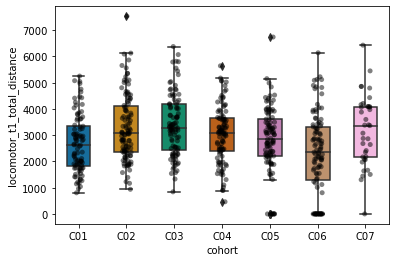

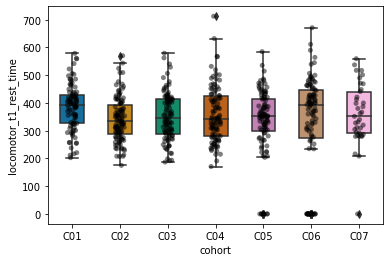

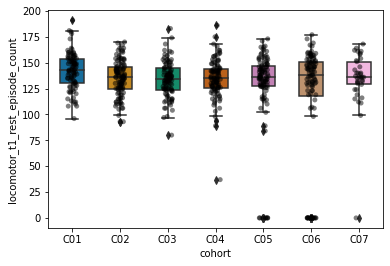

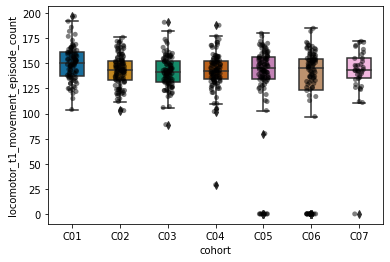

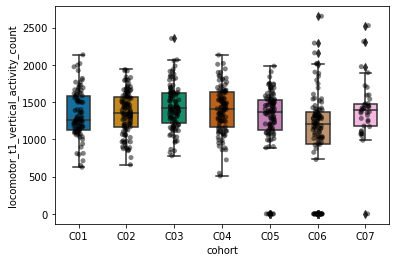

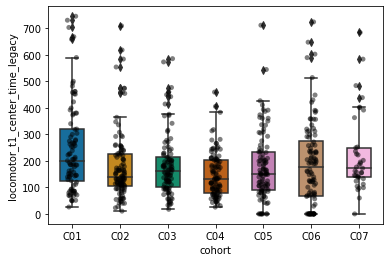

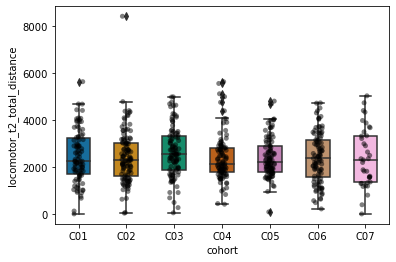

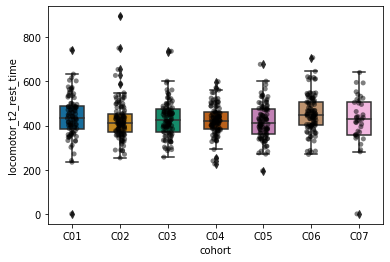

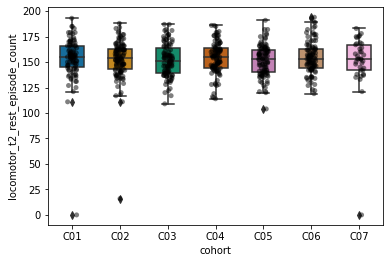

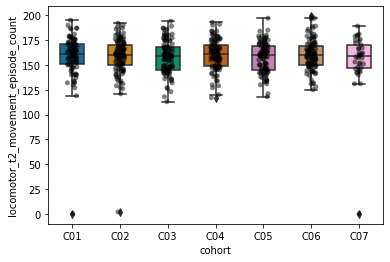

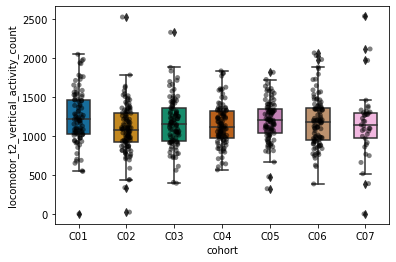

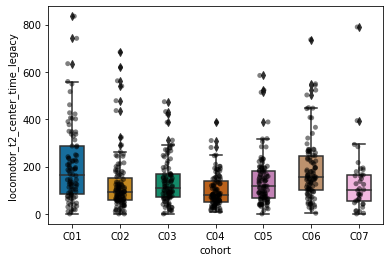

In [25]:
graph_columns = ['locomotor_t1_total_distance',
 'locomotor_t1_rest_time',
 'locomotor_t1_rest_episode_count',
 'locomotor_t1_movement_episode_count',
 'locomotor_t1_vertical_activity_count',
 'locomotor_t1_center_time_legacy',
 'locomotor_t2_total_distance',
 'locomotor_t2_rest_time',
 'locomotor_t2_rest_episode_count',
 'locomotor_t2_movement_episode_count',
 'locomotor_t2_vertical_activity_count',
 'locomotor_t2_center_time_legacy']
order_bin = pd.value_counts(df_groups['cohort']).sort_index().index
for col in graph_columns:
    sns.boxplot(y = col, x ='cohort', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind",
                order = order_bin)

    sns.stripplot(y = col, x ='cohort',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black',
                 order = order_bin)
    plt.show()

## Graphing by Cage

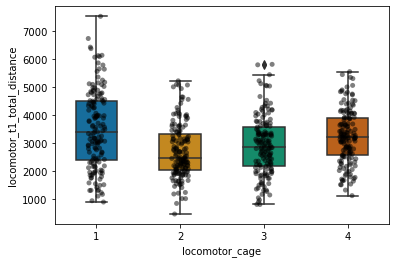

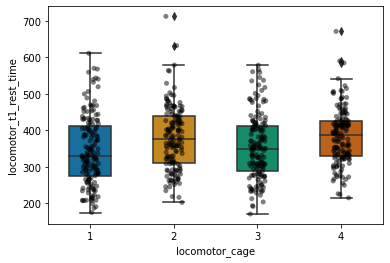

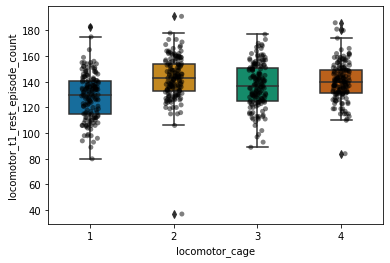

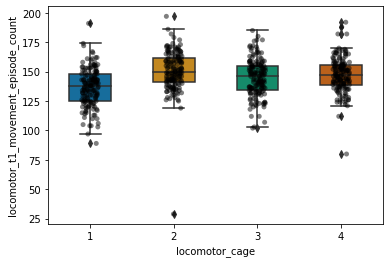

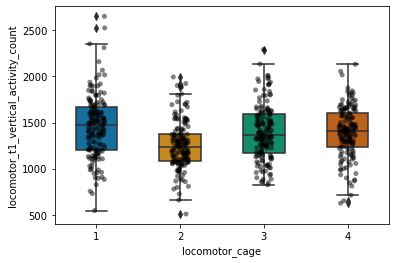

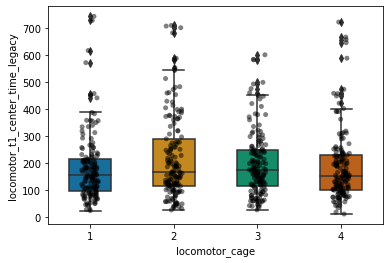

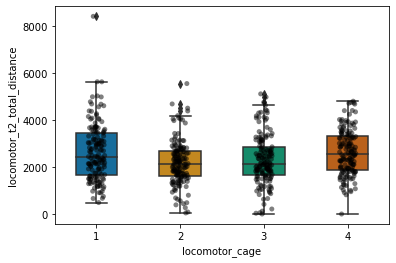

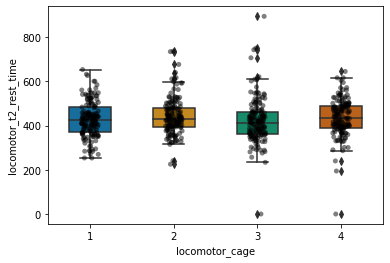

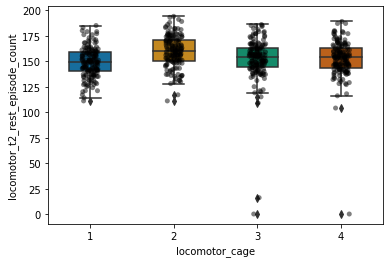

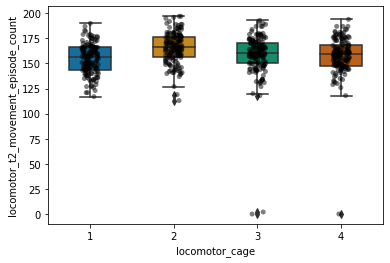

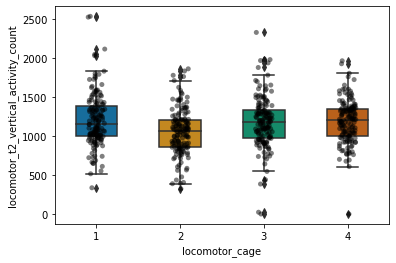

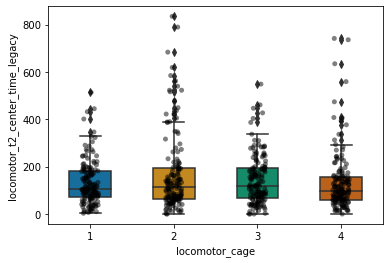

In [26]:
graph_columns = ['locomotor_t1_total_distance',
                 'locomotor_t1_rest_time',
                 'locomotor_t1_rest_episode_count',
                 'locomotor_t1_movement_episode_count',
                 'locomotor_t1_vertical_activity_count',
                 'locomotor_t1_center_time_legacy',
                 'locomotor_t2_total_distance',
                 'locomotor_t2_rest_time',
                 'locomotor_t2_rest_episode_count',
                 'locomotor_t2_movement_episode_count',
                 'locomotor_t2_vertical_activity_count',
                 'locomotor_t2_center_time_legacy']
order_bin = pd.value_counts(df_groups['locomotor_cage']).sort_index().index

for col in graph_columns:
    sns.boxplot(y = col, x ='locomotor_cage', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind",
               order = order_bin)

    sns.stripplot(y = col, x ='locomotor_cage',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black',
                 order = order_bin)
    plt.show()

## Graphing by Sex

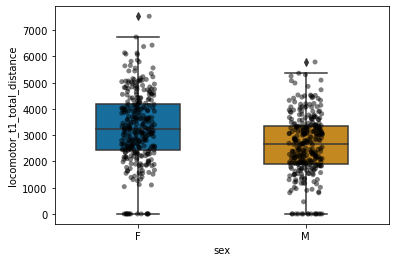

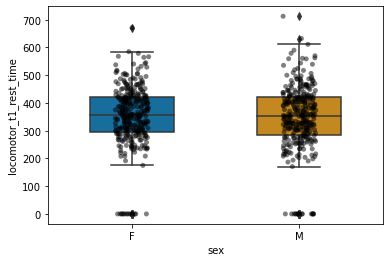

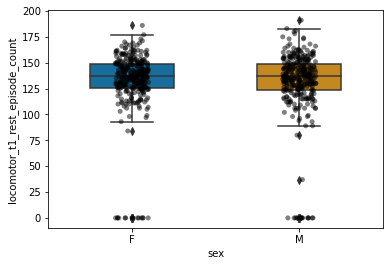

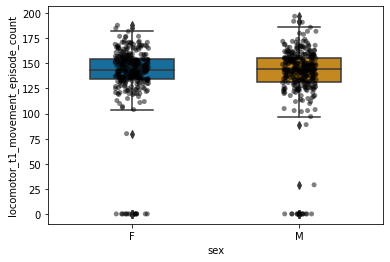

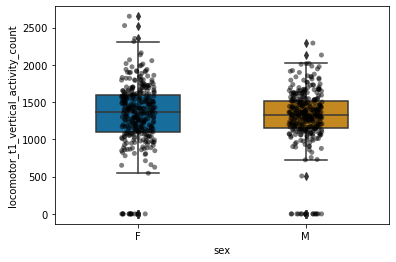

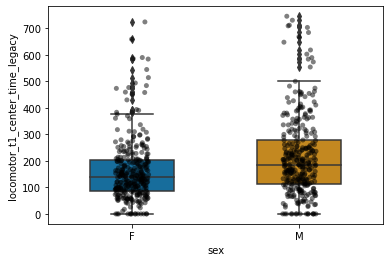

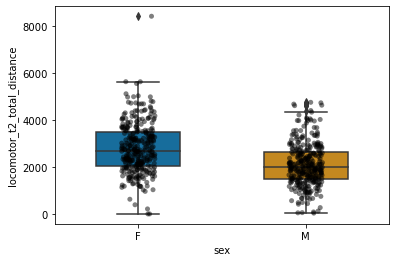

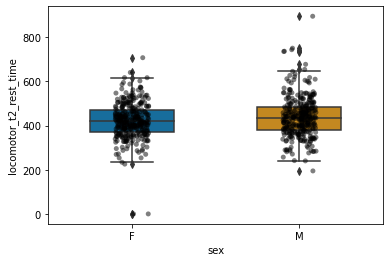

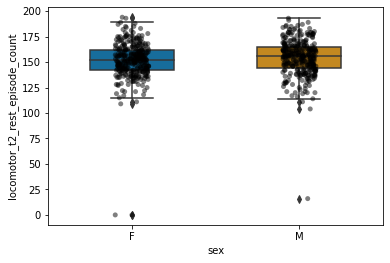

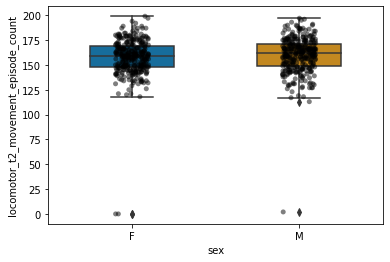

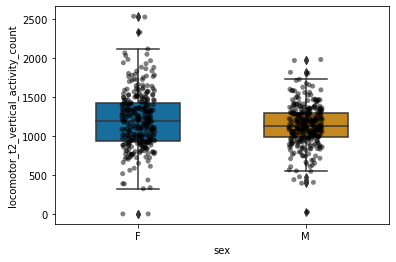

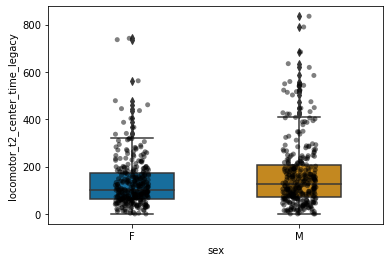

In [27]:
graph_columns = ['locomotor_t1_total_distance',
                 'locomotor_t1_rest_time',
                 'locomotor_t1_rest_episode_count',
                 'locomotor_t1_movement_episode_count',
                 'locomotor_t1_vertical_activity_count',
                 'locomotor_t1_center_time_legacy',
                 'locomotor_t2_total_distance',
                 'locomotor_t2_rest_time',
                 'locomotor_t2_rest_episode_count',
                 'locomotor_t2_movement_episode_count',
                 'locomotor_t2_vertical_activity_count',
                 'locomotor_t2_center_time_legacy']
for col in graph_columns:
    sns.boxplot(y = col, x ='sex', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='sex',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()

## Graphing by Coatcolor

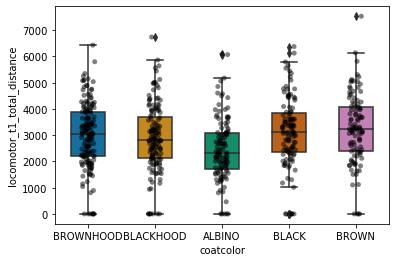

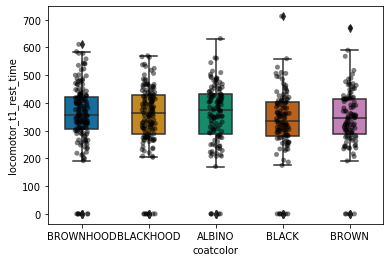

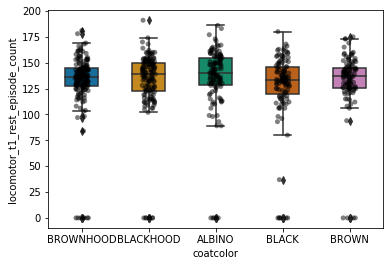

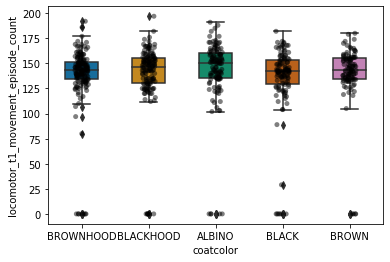

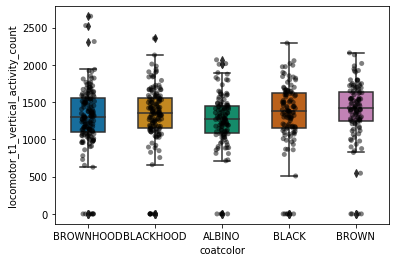

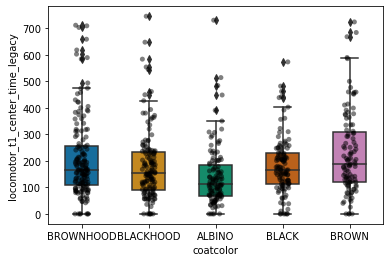

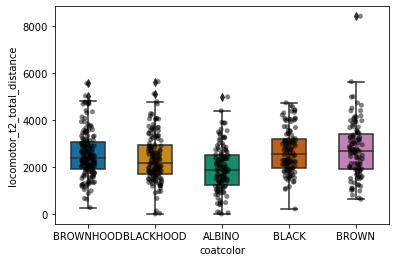

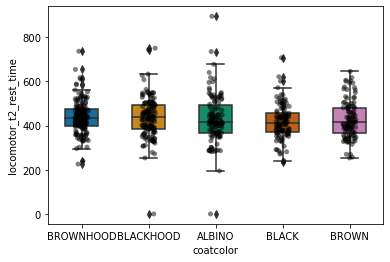

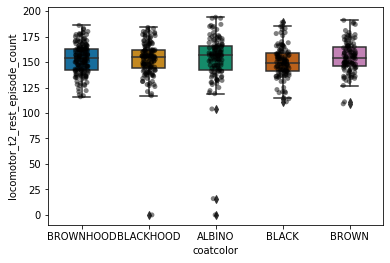

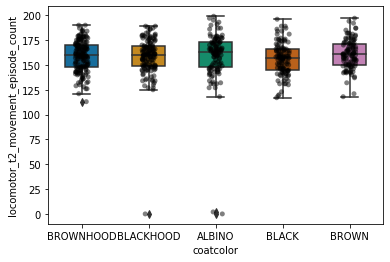

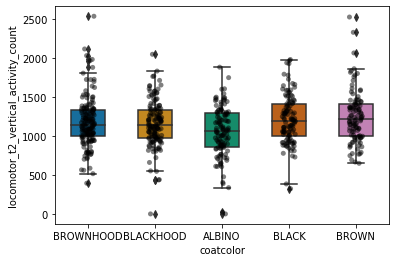

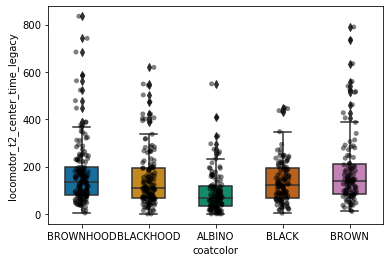

In [28]:
graph_columns = ['locomotor_t1_total_distance',
                 'locomotor_t1_rest_time',
                 'locomotor_t1_rest_episode_count',
                 'locomotor_t1_movement_episode_count',
                 'locomotor_t1_vertical_activity_count',
                 'locomotor_t1_center_time_legacy',
                 'locomotor_t2_total_distance',
                 'locomotor_t2_rest_time',
                 'locomotor_t2_rest_episode_count',
                 'locomotor_t2_movement_episode_count',
                 'locomotor_t2_vertical_activity_count',
                 'locomotor_t2_center_time_legacy']
for col in graph_columns:
    sns.boxplot(y = col, x ='coatcolor', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='coatcolor',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()

In [29]:

#save locomotor file
#df_groups.to_csv(r'C:\Users\cocoy\Dropbox (Palmer Lab)\Palmer Lab\Shae Ziegler\Suzanne_Mitchell_U01\locomotor.csv', index=False)
#df_groups.to_csv(r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01/locomotor.csv', index=False)


## Check the number of m/f per cage per cohort

In [31]:
#check sexes per cage

cohorts = ['C01','C02','C03','C04','C05','C06','C07']
cages = ['1','2','3','4']
values = {}

for cohort in cohorts:
    subset = df_groups[df_groups['cohort'] == cohort]
    for cage in cages:
        subset_cage = subset[subset['locomotor_cage'] == cage]
        for sex in ["M",'F']:
            subset_sex = subset_cage[subset_cage['sex'] == sex]
            key = cohort + '_' + str(cage) + '_' + sex
            values[key] = subset_sex.shape[0]
            #print(key,df_groups.shape)


values

{'C01_1_M': 17,
 'C01_1_F': 6,
 'C01_2_M': 17,
 'C01_2_F': 6,
 'C01_3_M': 9,
 'C01_3_F': 14,
 'C01_4_M': 8,
 'C01_4_F': 14,
 'C02_1_M': 11,
 'C02_1_F': 17,
 'C02_2_M': 11,
 'C02_2_F': 17,
 'C02_3_M': 15,
 'C02_3_F': 13,
 'C02_4_M': 14,
 'C02_4_F': 13,
 'C03_1_M': 13,
 'C03_1_F': 12,
 'C03_2_M': 13,
 'C03_2_F': 12,
 'C03_3_M': 12,
 'C03_3_F': 13,
 'C03_4_M': 12,
 'C03_4_F': 13,
 'C04_1_M': 15,
 'C04_1_F': 10,
 'C04_2_M': 15,
 'C04_2_F': 10,
 'C04_3_M': 10,
 'C04_3_F': 15,
 'C04_4_M': 10,
 'C04_4_F': 15,
 'C05_1_M': 10,
 'C05_1_F': 13,
 'C05_2_M': 10,
 'C05_2_F': 13,
 'C05_3_M': 13,
 'C05_3_F': 10,
 'C05_4_M': 13,
 'C05_4_F': 10,
 'C06_1_M': 8,
 'C06_1_F': 12,
 'C06_2_M': 8,
 'C06_2_F': 12,
 'C06_3_M': 12,
 'C06_3_F': 8,
 'C06_4_M': 12,
 'C06_4_F': 8,
 'C07_1_M': 3,
 'C07_1_F': 6,
 'C07_2_M': 3,
 'C07_2_F': 6,
 'C07_3_M': 5,
 'C07_3_F': 4,
 'C07_4_M': 6,
 'C07_4_F': 3}

In [ ]:
df_groups.columns